In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error


In [3]:
df = pd.read_csv('Companies.csv')
df.head(3)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39


In [4]:
# Separate features and target
X = df[['R&D Spend', 'Administration', 'Marketing Spend', 'State']]
y = df['Profit']

In [6]:
# One-hot encoding for the categorical variable 'State'
ct = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), ['State'])
    ],
    remainder='passthrough'  
)

pipeline = Pipeline(steps=[('preprocessor', ct),('model', LinearRegression())])

In [7]:
# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Train the Linear Regression Model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot', OneHotEncoder(),
                                                  ['State'])])),
                ('model', LinearRegression())])

In [9]:
# Make Predictions
y_pred = pipeline.predict(X_test)

# Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

# Optional: Display Predictions
for actual, predicted in zip(y_test, y_pred):
    print(f'Actual: {actual}, Predicted: {predicted:.2f}')


Mean Squared Error: 30775142.86
Actual: 124269.4859, Predicted: 124953.80
Actual: 111257.774, Predicted: 111734.50
Actual: 91370.72519, Predicted: 90901.26
Actual: 126846.883, Predicted: 127455.94
Actual: 161008.2863, Predicted: 161129.99
Actual: 91441.63138, Predicted: 90972.77
Actual: 154051.7917, Predicted: 154891.80
Actual: 138588.2636, Predicted: 139297.00
Actual: 87654.55773, Predicted: 88028.04
Actual: 91139.21223, Predicted: 90667.79
Actual: 167391.5514, Predicted: 167567.45
Actual: 162733.9549, Predicted: 162870.31
Actual: 104824.1057, Predicted: 104468.85
Actual: 107704.7762, Predicted: 108151.34
Actual: 91623.59544, Predicted: 91156.28
Actual: 159247.5918, Predicted: 159354.35
Actual: 116273.3187, Predicted: 116792.62
Actual: 104159.467, Predicted: 104673.06
Actual: 119961.2945, Predicted: 120511.90
Actual: 105154.7165, Predicted: 105579.63
Actual: 75445.02546, Predicted: 75617.73
Actual: 125271.5697, Predicted: 125867.26
Actual: 65181.56893, Predicted: 64489.78
Actual: 6999

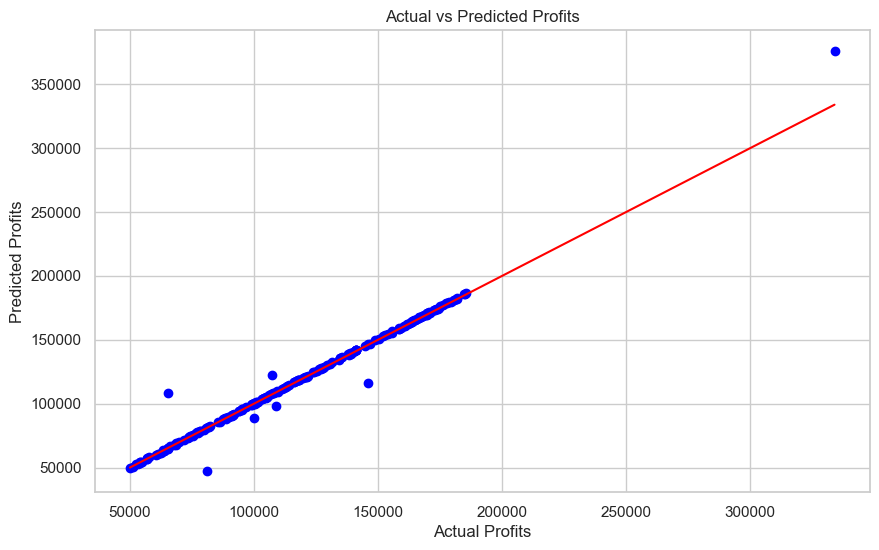

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot of actual vs predicted profits
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.title('Actual vs Predicted Profits')
plt.xlabel('Actual Profits')
plt.ylabel('Predicted Profits')


# Show the plot
plt.show()
